In [3]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

### **Завдання 6** (5 балів)

Для даних колонки **data.MSZoning** порахуйте даммі за допомогою [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) і для кожної категорії порахуйте кореляцію з неперервною колонкою **data.LotArea**

In [ ]:
MSZoning_map = {'RL':3, 
                'RM':2, 
                'C (all)':1, 
                'FV':4, 
                'RH':5}

HouseStyle_map = {'2Story':1, 
                  '1Story':2, 
                  '1.5Fin':3, 
                  '1.5Unf':4, 
                  'SFoyer':5, 
                  'SLvl':6, 
                  '2.5Unf':7,
                  '2.5Fin':8}

data["MSZoning"] = data["MSZoning"].map(MSZoning_map)
data["HouseStyle"] = data["HouseStyle"].map(HouseStyle_map)

In [ ]:
zoning_dummies_df = pd.get_dummies(data_clean[["MSZoning"]].astype(str))
print("MSZoning C (all)':", st.pointbiserialr(zoning_dummies_df.MSZoning_1, data_clean.LotArea))
print("MSZoning RM':", st.pointbiserialr(zoning_dummies_df.MSZoning_2, data_clean.LotArea))
print("MSZoning RL':", st.pointbiserialr(zoning_dummies_df.MSZoning_3, data_clean.LotArea))
print("MSZoning FV':", st.pointbiserialr(zoning_dummies_df.MSZoning_4, data_clean.LotArea))
print("MSZoning RH':", st.pointbiserialr(zoning_dummies_df.MSZoning_5, data_clean.LotArea))

MSZoning C (all)': PointbiserialrResult(correlation=-0.008765493256180727, pvalue=0.7382368958712239)
MSZoning RM': PointbiserialrResult(correlation=-0.27619847778164225, pvalue=6.633467316885028e-27)
MSZoning RL': PointbiserialrResult(correlation=0.3225704426991592, pvalue=1.3156335018639459e-36)
MSZoning FV': PointbiserialrResult(correlation=-0.13236272944304017, pvalue=4.007139053899633e-07)
MSZoning RH': PointbiserialrResult(correlation=-0.050707446570180045, pvalue=0.053057140735069175)


Для цього завдання я використала мапу зон та очищені дані з цього ноутбуку. Виразна кореляція спостерігається у зонах RM, RL, FV 

### **Завдання 7** (5 балів)


Оберіть будь-які 3 колонки з датасету, які не використовувались раніше і порахуйте для них кореляцію. Можете вибрати різні типи колонок, тоді для кожного типу оберіть правильну кореляцію. Або якщо всі ваші колонки одинакового типу, то порахуйте всеодно 2-3 типи кореляції. Результати прокоментуйте

In [ ]:
data = housing.data[['LotArea', 'HouseStyle', 'OverallQual', 'Fireplaces', 'TotalBsmtSF']]
data

,LotArea,HouseStyle,OverallQual,Fireplaces,TotalBsmtSF
0,8450.0,2Story,7.0,0.0,856.0
1,9600.0,1Story,6.0,1.0,1262.0
2,11250.0,2Story,7.0,1.0,920.0
3,9550.0,2Story,7.0,1.0,756.0
4,14260.0,2Story,8.0,1.0,1145.0
...,...,...,...,...,...
1455,7917.0,2Story,6.0,1.0,953.0
1456,13175.0,1Story,6.0,2.0,1542.0
1457,9042.0,2Story,7.0,2.0,1152.0
1458,9717.0,1Story,5.0,0.0,1078.0


In [ ]:
print("Point Biserial:", st.pointbiserialr(data.OverallQual, data.TotalBsmtSF))
print("Pearson:", st.pearsonr(data_clean.LotArea, data_clean.TotalBsmtSF))

freq_fire = pd.crosstab(index=data.HouseStyle, columns=data.Fireplaces)
print("Chi2 Contingency:", st.chi2_contingency(freq_fire))


Point Biserial: PointbiserialrResult(correlation=0.5378084986123912, pvalue=3.130271237707405e-110)
Pearson: (0.3495100453286647, 4.354700578698111e-43)
Chi2 Contingency: (63.6285211674773, 3.5522363344136845e-06, 21, array([[7.27808219e+01, 6.85616438e+01, 1.21301370e+01, 5.27397260e-01],
       [6.61643836e+00, 6.23287671e+00, 1.10273973e+00, 4.79452055e-02],
       [3.43109589e+02, 3.23219178e+02, 5.71849315e+01, 2.48630137e+00],
       [3.78082192e+00, 3.56164384e+00, 6.30136986e-01, 2.73972603e-02],
       [5.19863014e+00, 4.89726027e+00, 8.66438356e-01, 3.76712329e-02],
       [2.10308219e+02, 1.98116438e+02, 3.50513699e+01, 1.52397260e+00],
       [1.74863014e+01, 1.64726027e+01, 2.91438356e+00, 1.26712329e-01],
       [3.07191781e+01, 2.89383562e+01, 5.11986301e+00, 2.22602740e-01]]))


Спостерігається виразна кореляція між категорією якості і загальною площею підвального приміщення (точково бісерійний аналіз). Вірогідно наявність та розміри підвалу були важливим фактором при оцінці будинку. Також є кореляція між загальною площею та розмірами підвалу (коефіцієнт Пірсона).
Окрім цього є кореляція між стилем приміщення та наявністю в ньому каміну (хі квадрат для двох категоріальних параметрів)

### **Завдання 8** (3 бали)

Напишіть самостійно функції для MSE та MAE. Функції мають приймати два numpy array і віддавати на вихід число. Перевірте їх на наступних даних і звіртесь з відповіддю:


```
list1 = np.array([1,2,3,4,5])
list2 = np.array([0,4,2,3,2])
mse = your_mse_function(list1, list2)
mae = your_mae_function(list1, list2)
### ANSWERS
mse = 3.2
mae = 1.6
```



In [8]:
def your_mse_function(y_t, y_p):
  mse = np.square(np.subtract(y_t, y_p)).mean()
  return mse

def your_mae_function(y_t, y_p):
  mae = np.mean(np.abs(y_t - y_p))
  return mae


In [9]:
list1 = np.array([1,2,3,4,5])
list2 = np.array([0,4,2,3,2])
print(your_mse_function(list1, list2))
print(your_mae_function(list1, list2))

3.2
1.6


### **Завдання 9** (7 балів)

Виберіть 5 колонок з даних ([Data info (Ames housing dataset)](https://www.openml.org/d/42165)) і побудуйте лінійну регресію для прогнозування ціни (housing.target). Спробуйте покращити модель додаючи нові трансформації (побудуйте 3 варіанти моделі). Кожну модель оцініть за допомогою MSE та MAE. Прокоментуйте яка модель найкраще пояснює дані?

In [4]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data[["OverallQual", "GrLivArea", "LotArea", "TotalBsmtSF", "HouseStyle"]]
target = housing.target
data = pd.concat([data, target], axis = 1)

In [6]:
target.mean()

180921.19589041095

In [12]:
from statsmodels.formula.api import ols as OLS_formula

ols = OLS_formula(data = data, formula = "SalePrice ~  C(OverallQual) + GrLivArea + LotArea + TotalBsmtSF + C(HouseStyle)")
ols = ols.fit()
print("\n------------------------------All parameters")
print(ols.summary())
preds = ols.predict(data)
print('MSE result: ' + str(your_mse_function(target, preds)))
print('MAE result: ' + str(your_mae_function(np.array(target), np.array(preds))))

ols = OLS_formula(data = data, formula = "SalePrice ~ GrLivArea + LotArea + TotalBsmtSF")
ols = ols.fit()
print("\n------------------------------Only numerical")
print(ols.summary())
preds = ols.predict(data)
print('MSE result: ' + str(your_mse_function(target, preds)))
print('MAE result: ' + str(your_mae_function(target, preds)))

ols = OLS_formula(data = data, formula = "SalePrice ~  C(OverallQual) + GrLivArea + np.log(LotArea) + TotalBsmtSF + C(HouseStyle)")
ols = ols.fit()
print("\n------------------------------Log LotArea")
print(ols.summary())
preds = ols.predict(data)
print('MSE result: ' + str(your_mse_function(target, preds)))
print('MAE result: ' + str(your_mae_function(target, preds)))



------------------------------All parameters
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     290.1
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        16:32:51   Log-Likelihood:                -17395.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1440   BIC:                         3.494e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

При врахуванні усіх п'ятьох обраних параметрів модель досить добре описує кореляцію. Найбільший позитивний вплив є у оцінці загальної якості будівлі: чим вищий рівень, тим більша ціна. Якщо ми візьмемо лише кількісні параметри , то показник R-squared зменшується, так само як і MAE , скоріше за все тому, що менше параметрів враховується для тренування моделі. У другому варіанті також видно, що LotArea є не надто корисним для моделі, можливо через аутлаєри, тому у третьому варіанті цей показник був видозмінений. У цьому варіанті MAE - мінімальна, а показник R-squared найвищий.
Отже третя модель тут вірогідно є найбільш оптимальною, оскільки R-squared найвищий, а аутлаєри у параметрі LotArea менше впливають на результат. Але найкраща модель враховувала б всі параметри, але без частини категорій в якісних змінних, що я і зробила в наступному завданні.

### **Завдання 10** (5 балів)

Погляньте на коефіцієнти найкращої моделі. Чи є такі, які показують, що предиктор не важливий? Спробуйте видалити ці предиктори. Чи сильно змінились коефіцієнти тих предикторів, які лишились? Ітерпертуйте їх значення.

В попередніх моделях було видно, що у деяких категоріальних змінних частина категорій мають дуже велике p-value, тому я спробувала їх видалити. Я не знайшла як це зробити із попередньою нотацією, тому звернулась до даммі змінних та модулю statsmodels.api. Тут майже всі коефіцієнти мають p-value близьке до нуля, найвищий R-squared, а також менша у порівнянні з другою моделлю MAE. Три коефіцієнта мають від'ємну кореляцію: так, вірогідно низькі рівні якості зменшують загальну ціну будівлі. Але для мене залишилось незрозумілим, чому загальна площа також негативно корелює із ціною 

In [47]:
HouseStyle_map = {'2Story':1, 
                  '1Story':2, 
                  '1.5Fin':3, 
                  '1.5Unf':4, 
                  'SFoyer':5, 
                  'SLvl':6, 
                  '2.5Unf':7,
                  '2.5Fin':8}
                  
data["HouseStyle"] = data["HouseStyle"].map(HouseStyle_map)  

In [48]:
data = pd.concat([data, pd.get_dummies(data['HouseStyle'].astype('str'), prefix = 's')], axis = 1)

In [49]:
data = pd.concat([data, pd.get_dummies(data['OverallQual'].astype('str'), prefix = 'q')], axis = 1)

In [50]:
data["LotArea"] = np.log(data["LotArea"])

In [51]:
from statsmodels.api import OLS

ols = OLS(data.SalePrice, data[["OverallQual", "GrLivArea", "LotArea", "TotalBsmtSF", "s_1", "s_2", "s_5", "s_6",
                                "q_6.0", "q_7.0", "q_8.0", "q_9.0"]])
ols = ols.fit()
print(ols.summary())
preds = ols.predict(data[["OverallQual", "GrLivArea", "LotArea", "TotalBsmtSF", "s_1", "s_2", "s_5", "s_6",
                                "q_6.0", "q_7.0", "q_8.0", "q_9.0"]])
print('MSE result: ' + str(your_mse_function(target, preds)))
print('MAE result: ' + str(your_mae_function(target, preds)))

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              3004.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):                        0.00
Time:                        20:37:37   Log-Likelihood:                         -17499.
No. Observations:                1460   AIC:                                  3.502e+04
Df Residuals:                    1448   BIC:                                  3.509e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### **Завдання 11** (4 бали)

Побудуйте бінарну логістичну регресію на даних про громадські проекти. Предиктори:


*   expected_amount - num - бюджет
*   location - cat - місто проекту
* platform - cat - платформа, де дув опублікований проект
* platform_type - cat - джерело фінансування
* capital - тип проекту
* year - рік публікації проекту

Цільова:

* status_num - cat - мітка реалізації проекту (1 - успішний, 0 - ні)


Прокоментуйте значення коефіцієнтів. Який з них впливає позитивно на успішність проекту? А який ні? Наскільки сильно? Чи є предиктор, який не впливає на цільову взагалі?

In [19]:
df = pd.read_csv('https://github.com/NataliaNovosad/Datasets/blob/master/cleaned_public_projects.csv?raw=true')

In [20]:
df.head()

,status_num,expected_amount,location,platform,platform_type,capital,year
0,0,18000000.0,Житомир,Unknown,Громадський бюджет,Інфраструктурний,2020
1,0,18000000.0,Житомир,Unknown,Громадський бюджет,Інфраструктурний,2020
2,0,18000000.0,Житомир,Unknown,Громадський бюджет,Інфраструктурний,2020
3,1,13061664.0,Полтава,Unknown,Громадський бюджет,Інфраструктурний,2019
4,0,10166606.0,Полтава,Unknown,Громадський бюджет,Інфраструктурний,2019


In [30]:
df.platform_type.value_counts()

Громадський бюджет    14214
Краудфандинг           1767
Name: platform_type, dtype: int64

In [27]:
from statsmodels.formula.api import mnlogit, logit

f = "status_num ~ expected_amount + C(location) + C(platform) + C(platform_type) + C(capital, Treatment(reference='Культурний')) + C(year)"
logit = mnlogit(data = df, formula = f)
logit = logit.fit(method='bfgs')
print(logit.summary())

C:\Users\alisa\miniconda3\envs\chesno\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\alisa\miniconda3\envs\chesno\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


         Current function value: 0.583526
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
                          MNLogit Regression Results                          
Dep. Variable:             status_num   No. Observations:                15981
Model:                        MNLogit   Df Residuals:                    15925
Method:                           MLE   Df Model:                           55
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                 0.08844
Time:                        15:57:54   Log-Likelihood:                -9325.3
converged:                      False   LL-Null:                       -10230.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     status_num=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\Users\alisa\miniconda3\envs\chesno\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Найбільше на модель впливають параметри бюджету проекту, локації та капіталу. Бюджет має від'ємну кореляцію, тобто варто очікувати, що чим менше коштів закладено у проект, тим більша ймовірність, що його підтримають. У людського і соціального капіталу p-value дорівнює 0, а коефіцієнт позитивний, хоча і невеликий. Найбільший коефіцієнт, при низькому p-value, мають міста Харків, Кривий Ріг та Одеса. Схоже, що рік проекту, сума коштів та платформа не надто впливають на цільову.
Таким чином, згідно із даною моделлю проекти з категорій людського та соціального капіталу у таких містах як Харків, Кривий Ріг та Одеса мають більше шансів на виграш.

У мене залишилось питання, як модель обирає base value, який не врахований у підсумку. Я спробувала змінити його для однієї категорії і значення трохи покращилось.
А також знову питання як (і чи можна взагалі) виключати окремі параметри з категоріальних змінних

### **Завдання 12** (3 бали)

Порахуйте наступні показники точності моделі: recall, precision, f1-score, accuracy, confusion matrix. Прокоментуйте наскільки добре модель пояснює дані.

In [29]:
from sklearn.metrics import classification_report

preds = logit.predict(df.drop("status_num", axis = 1))

print(classification_report(df.status_num, preds.idxmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81     10569
           1       0.67      0.25      0.37      5412

    accuracy                           0.70     15981
   macro avg       0.69      0.59      0.59     15981
weighted avg       0.70      0.70      0.66     15981



Ця модель точніше і повніше пояснює клас 0: 71% значень, які дійсно до нього належали були передбачені правильно і 93% з них були знайдені. З проектами, що перемогли передбачення дещо менш точні (67%), але лише 25% позитивних значень з класу 1 були знайдені. Ці ж тенденції показує f1-score. Це значить, що модель досить добре передбачає проекти, що будуть відхилені, але погано - виграшні. Загалом її точність дорівнює 70%.


### **Завдання 13** (3 бали)

Порахуйте AUC і намалюйте AUC криву використовуючи **[sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)** та [приклад1](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) і [приклад2](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(df.status_num, preds[1])

Тут у мене виникла проблема з тим, що коли я подавала на вхід таблицю з вірогідностями preds, виникала помилка ValueError: y should be a 1d array, got an array of shape (15981, 2) instead. Тому я вирішила зробити AUC з позитивним класом

In [49]:
fpr, tpr, thresholds = roc_curve(df.status_num, preds[1])

In [50]:
thresholds

array([1.94072171e+00, 9.40721710e-01, 9.39245433e-01, ...,
       2.01840985e-03, 5.88067321e-04, 1.21988865e-04])

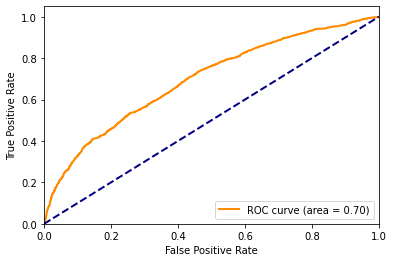

In [54]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
